# W200 Introduction to Data Science Programming, UC Berkeley MIDS
# Project 2




3254
51


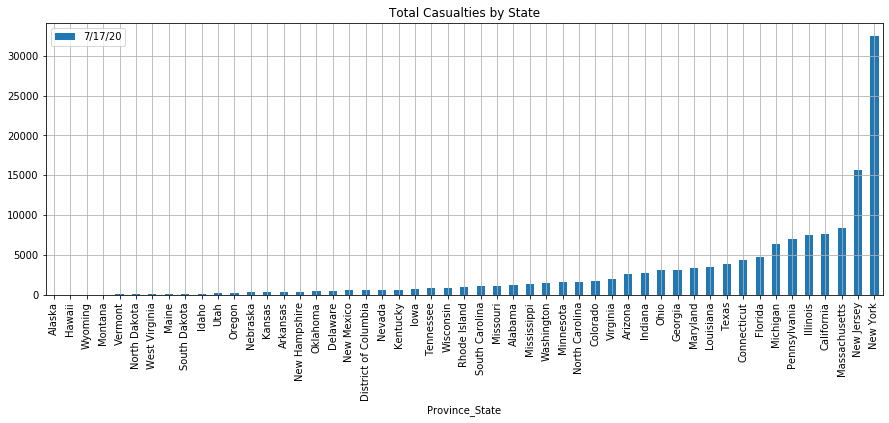

In [2]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import matplotlib.ticker as mtick


#historical_data = \
df = pd.read_csv(r"C:/users/leygr/desktop/w200/project2_input_US.csv")
df = df.drop(columns=['UID','iso2','iso3','code3', 'FIPS','Admin2','Country_Region','Lat',\
                'Long_','Combined_Key'])
Not_states = ["American Samoa", "Guam", "Northern Mariana Islands", "Virgin Islands", "Puerto Rico", "Diamond Princess",\
             "Grand Princess"]
df = df[~ (df["Province_State"] .isin(Not_states))]
#print(df["Province_State"][6:8])
confirmed = df[df["Stat"] == "Confirmed"]
print(confirmed.shape[0])
confirmed_by_state = confirmed.groupby("Province_State").sum().reset_index()
print(confirmed_by_state.shape[0])

deaths = df[df["Stat"] == "Deaths"]
deaths_by_state = deaths.groupby("Province_State").sum()
deaths_by_state = deaths_by_state.sort_values(deaths_by_state.columns[-2])
deaths_by_state.plot.bar(y=deaths_by_state.columns[-2],figsize = (15,5),title = "Total Casualties by State", grid = True)


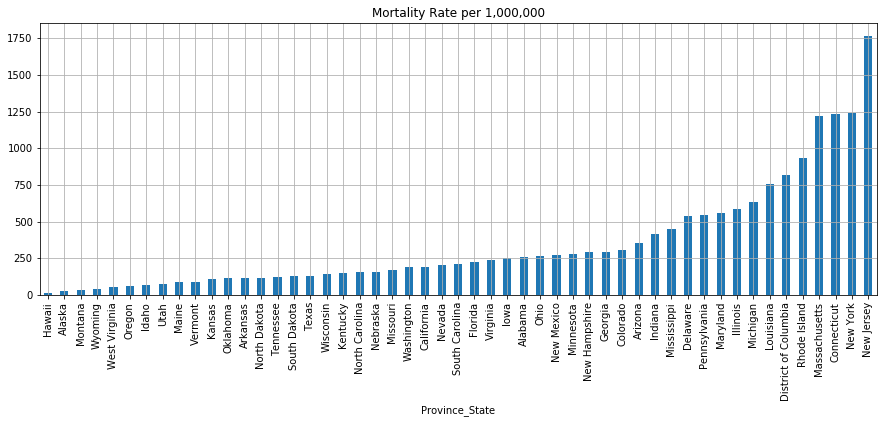

In [3]:
pct_deaths_by_state = deaths_by_state.copy()
for col in pct_deaths_by_state.columns[1:-1]:
    pct_deaths_by_state[col] = pct_deaths_by_state[col]/pct_deaths_by_state['Population']*1000000
pct_deaths_by_state = pct_deaths_by_state.sort_values(pct_deaths_by_state.columns[-2])
pct_plot = pct_deaths_by_state.plot(y=pct_deaths_by_state.columns[-2],kind = 'bar',figsize = (15,5),\
                                    title = "Mortality Rate per 1,000,000", grid=True, legend = False)   #,logy=True)

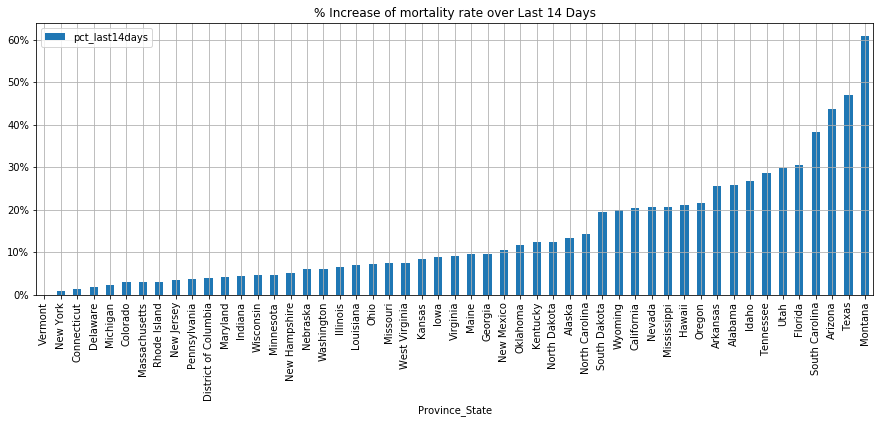

In [4]:
deaths_by_state['pct_last14days'] = ((deaths_by_state['7/17/20']/deaths_by_state['7/3/20'])-1)
#print(deaths_by_state['pct_last14days'])
#print(deaths_by_state['pct_last14days'].shape)
#print(deaths_by_state.head())

deaths_by_state = deaths_by_state.sort_values(by=['pct_last14days'])
print(deaths_by_state.loc['pct_last14days'])
#deaths_by_state.plot.bar(y=deaths_by_state.columns[-1],figsize = (15,5),grid=True,\
                         title = "% Increase of mortality rate over Last 14 Days")
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(1))
#['pct_last14days']


Text(4/16/20, 400000, 'Mask mandate')

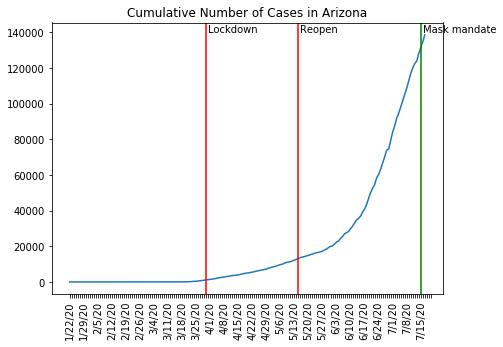

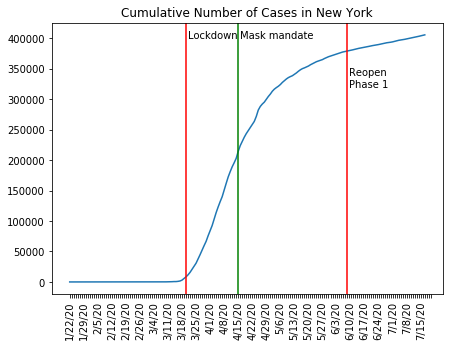

In [37]:
import matplotlib.ticker as ticker
cases = df[df["Stat"] == "Confirmed"]
cases_by_state = cases.groupby("Province_State").sum()
cases_by_state = cases_by_state.sort_values(cases_by_state.columns[-2])
#cases_by_state.plot.bar(y=cases_by_state.columns[-2],figsize = (15,5),title = "Cases by State")

pct_cases_by_state = cases_by_state.copy()
for col in pct_cases_by_state.columns[1:-1]:
    pct_cases_by_state[col] = pct_cases_by_state[col]/deaths_by_state['Population']
pct_cases_by_state = pct_cases_by_state.sort_values(pct_cases_by_state.columns[-1])
#pct_cases_by_state.plot.bar(y=pct_cases_by_state.columns[-1],figsize = (15,5),title = "% Cases by State")

cases_by_state['last30days'] = cases_by_state['7/17/20'] - cases_by_state['6/17/20']
cases_by_state = cases_by_state.sort_values(cases_by_state.columns[-1])
#cases_by_state.plot.bar(y=cases_by_state.columns[-1],figsize = (15,5),title = "Cases over last 30 days")

cases_by_state['pct_last30days'] = (cases_by_state['7/17/20'] / cases_by_state['6/17/20']) - 1
cases_by_state = cases_by_state.sort_values(cases_by_state.columns[-1])
#cases_by_state.plot.bar(y=cases_by_state.columns[-1],figsize = (15,5),title = "% Chg in cases over last 30 days")

#print(cases_by_state.loc["Arizona"])
# Line plot of worst cases over the last 30 days over time with overlay of lockdown period
# New york, Arizona
plt.figure(figsize = (7,5))
plt.plot(cases_by_state.loc["Arizona"][:-3])
plt.title("Cumulative Number of Cases in Arizona")
dates = list(cases_by_state.columns)
date_labels = [dates[i] if i%7 == 0 else ' ' for i in range(len(dates))]
plt.xticks(dates,date_labels,rotation = 90)
#reopen
plt.axvline(x="5/15/20", c="r")
plt.annotate(xy=['5/16/20',140000], s="Reopen")
#close
plt.axvline(x="3/30/20", c="r")
plt.annotate(xy=['3/31/20',140000], s="Lockdown")
# masks requirements
plt.axvline(x="7/15/20", c="g")
plt.annotate(xy=['7/16/20',140000], s="Mask mandate")

plt.figure(figsize = (7,5))
plt.plot(cases_by_state.loc["New York"][:-3])
plt.title("Cumulative Number of Cases in New York")
dates = list(cases_by_state.columns)
date_labels = [dates[i] if i%7 == 0 else ' ' for i in range(len(dates))]
plt.xticks(dates,date_labels,rotation = 90)
#Phase 1 reopen
plt.axvline(x="6/8/20", c="r")
plt.annotate(xy=['6/9/20',320000], s="Reopen\nPhase 1")
#close
plt.axvline(x="3/20/20", c="r")
plt.annotate(xy=['3/21/20',400000], s="Lockdown")
#masks
plt.axvline(x="4/15/20", c="g")
plt.annotate(xy=['4/16/20',400000], s="Mask mandate")

#cases_by_state.plot.line(y=cases_by_state.columns[-2],figsize = (15,5),title = "Cases by State")

<Figure size 504x360 with 0 Axes>

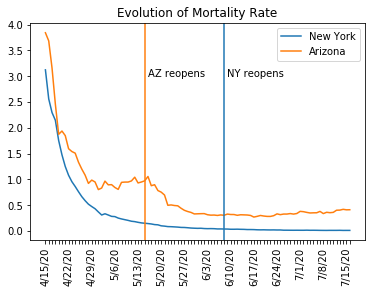

In [11]:
import datetime
import matplotlib
dates = []
x = []
y = []

for i in range(70,len(deaths_by_state.columns)-17):
    dates.append(deaths_by_state.columns.values[i+14])
    x.append(deaths_by_state.loc["New York"][i+14]/deaths_by_state.loc["New York"][i]-1)
    y.append(deaths_by_state.loc["Arizona"][i+14]/deaths_by_state.loc["Arizona"][i]-1)

plt.figure(figsize = (7,5))
fig, ax = plt.subplots(1,1)
ax.plot(dates, x, label = "New York")
ax.plot(dates,y, label = "Arizona")
plt.title("Evolution of Mortality Rate")
plt.legend()

ax.set_xticks(dates)
date_labels = [dates[i] if i%7 == 0 else ' ' for i in range(len(dates))]
ax.set_xticklabels(date_labels,rotation = 90)

plt.axvline(x="5/15/20", c="C1")
plt.annotate(xy=['5/16/20',3], s="AZ reopens")

plt.axvline(x="6/8/20", c="C0")
plt.annotate(xy=['6/9/20',3], s="NY reopens")

plt.show()

